In [71]:
import numpy as np
import cv2
import glob
import xml.etree.ElementTree
import matplotlib.pyplot as plt


In [85]:

class Reading(object):
    """__init__() functions as the class constructor"""
    def __init__(self, xmin=None, ymin=None, xmax=None, ymax=None, difficult=None, truncated=None):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.difficult = difficult
        self.truncated = truncated

docs = glob.glob('dataset-master\\Annotations\\' + '*.xml')      

list_reading_arr = []

for doc in docs:
    #tree = xml.etree.ElementTree.parse('//dataset-master//Annotations//BloodImage_00000.xml')
    tree = xml.etree.ElementTree.parse(doc)
    root = tree.getroot()
    len_data = int(len(tree.findall('.//object//'))/9)
    list_reading = [Reading() for i in range(len_data)]
    
    count = 0
    #print("Print out the attrib of the root:\n")
    for objs in tree.findall('.//object//'):
        index_of_reading = int(count/9)
        if count%9 == 2:
            list_reading[index_of_reading].truncated = int(objs.text)
        if count%9 == 3:
            list_reading[index_of_reading].difficult = int(objs.text)
        if count%9 == 5:
            list_reading[index_of_reading].xmin = int(objs.text)
        if count%9 == 6:
            list_reading[index_of_reading].ymin = int(objs.text)
        if count%9 == 7:
            list_reading[index_of_reading].xmax = int(objs.text)
        if count%9 == 8:
            list_reading[index_of_reading].ymax = int(objs.text)
        count+=1
    list_reading_arr.append(list_reading)
    for i in list_reading:
        if i.xmax == i.xmin or i.ymax == i.ymin:
            print(doc)
            list_reading.remove(i)
        #print("cordinates:",i.xmin,i.ymin,i.xmax,i.ymax)

print(list_reading_arr[0][0].xmin)


def crop_and_resize(img, listRead, size):
    w, h = size
    
    img_arr =[]
    
    for read in listRead:
            
        xmin, ymin, xmax, ymax = (read.xmin,read.ymin,read.xmax,read.ymax)
        #print([xmin, ymin, xmax, ymax])
        img_crop = img[ymin:ymax,xmin:xmax]
        img_resized = cv2.resize(img_crop,(w, h), interpolation = cv2.INTER_CUBIC)
        img_arr.append(img_resized)
        
    return img_arr

def label_generator(read):
    return read.truncated + read.difficult*2 + 1
    

dataset-master\Annotations\BloodImage_00338.xml
dataset-master\Annotations\BloodImage_00343.xml
216


In [82]:
path = 'dataset-master\\JPEGImages\\'
images = glob.glob(path + '*.jpg')

RBC_arr = []
label_arr = []
#read images and make each into an array
i=0
for img in images:
    RBC_this = cv2.imread(img)
    RBC_this_arr = crop_and_resize(RBC_this, list_reading_arr[i], (40,40))
    j = 0
    for RBC in RBC_this_arr:
        label = label_generator(list_reading_arr[i][j])
        RBC = np.reshape(RBC, -1)
        RBC_arr.append(RBC)
        label_arr.append(label)
        j+=1
        
    i+=1
    if(i==len(list_reading_arr)):
        break
    
RBC_arr = np.asarray(RBC_arr).T
RBC_mean = np.mean(RBC_arr, axis = 1)[np.newaxis]
RBC_centered = RBC_arr - RBC_mean.T
RBC_norm = np.linalg.norm(RBC_centered, axis = 1)[np.newaxis]
RBC_normalized = RBC_centered/RBC_norm.T

U, S, V = np.linalg.svd(RBC_normalized)

S_total = np.linalg.norm(S)**2
S_incr = 0
k = 0
for s in S:
    S_incr += s**2
    if(S_incr >= 0.95*S_total):
        break
    k += 1
    



In [ ]:
#Principle components
U_k = []
for i in range(k):
    U_k.append(U[:, i])
    
U_k = np.asarray(U_k)   
RBC_tilta = []
for RBC in RBC_normalized.T:
    RBC_tilta.append(list(map(lambda x:np.inner(x, RBC), U_k.tolist())))




In [ ]:
RBC_tilta_list = co




fig = plt.figure()
ax = fig.add_subplot(111)



In [92]:
print(U_k.shape)
print(RBC_normalized.shape)
A = np.array([[1,2, 3],[3,2, 5]])
B = np.array([5,1])
np.inner(A, B)

(112, 4800)
(4800, 3852)


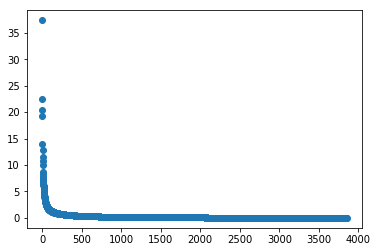

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(len(S)), S)
plt.show()

In [69]:
print(RBC_normalized.shape)
np.argmax(label_arr)
label_arr[2]

(3852, 4800)


2

In [31]:
RBC_norm = np.linalg.norm(RBC_centered, axis = 1)[np.newaxis]
RBC_normalized = RBC_centered/RBC_norm.T

ValueError: operands could not be broadcast together with shapes (366,921600) (1,366) 

In [26]:
len(RBC_arr)
A = [[[1,2,3],[2,3,2],[3,4,3]],[[11,12,13],[12,13,12],[13,14,13]]]
A_vec = np.reshape(A, -1)  
B_vec = np.flip(A_vec)
A_centered = np.mean(np.asarray([A_vec, B_vec]), axis = 0)
print(A_centered)

[7. 8. 8. 7. 8. 7. 8. 8. 7. 7. 8. 8. 7. 8. 7. 8. 8. 7.]


In [12]:
print(RBC_arr[0])

[[[143 154 176]
  [143 154 176]
  [145 153 176]
  ...
  [203 197 190]
  [201 195 188]
  [199 193 186]]

 [[143 154 176]
  [143 154 176]
  [145 153 176]
  ...
  [203 197 190]
  [201 195 188]
  [199 193 186]]

 [[141 155 174]
  [141 155 174]
  [143 154 174]
  ...
  [201 198 190]
  [199 196 188]
  [197 194 186]]

 ...

 [[206 205 207]
  [201 203 204]
  [197 198 202]
  ...
  [185 124 162]
  [191 125 166]
  [197 131 172]]

 [[209 206 208]
  [204 203 205]
  [198 197 201]
  ...
  [184 121 161]
  [191 123 164]
  [196 128 169]]

 [[210 207 209]
  [206 203 205]
  [197 196 200]
  ...
  [183 120 160]
  [190 122 163]
  [197 127 168]]]


In [23]:
img = RBC_arr[0]

def crop_and_resize(img, bound, size):
    
    xmin, ymin, xmax, ymax = bound
    w, h = size
    
    img_crop = img[ymin:ymax,xmin:xmax]
    #cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    img_resized = cv2.resize(img_crop,(w, h), interpolation = cv2.INTER_CUBIC)
    return img_resized
    
img_resized = crop_and_resize(img, (100, 50, 250, 200), (100, 100))
cv2.imshow('img', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()